### DEMSLV06 
# Illustrates function iteration, Newton, and secant methods

In [1]:
from compecon.demos import demo
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Function Iteration

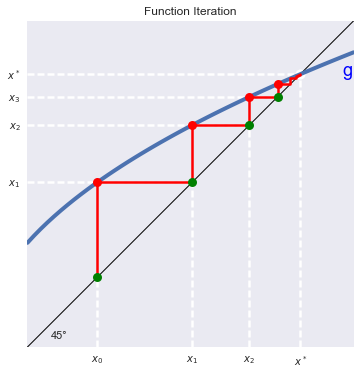

In [2]:
def g(x):
    return (x + 0.2)**0.5

xmin, xmax = 0.0, 1.4
xinit, xstar = 0.3, 0.5*(1 + np.sqrt(1.8))
xx = np.linspace(xmin,xmax)
yy = g(xx)

n = 21
z = np.zeros(n)
z[0] = xinit
for k in range(n-1):
    z[k+1] = g(z[k])
x, y = z[:-1], z[1:]

fig1 = demo.figure('Function Iteration','','',[xmin,xmax],[xmin,xmax], figsize=[6,6])
ax = plt.gca()
ax.set_aspect(1)
ax.set_xticks( x[:3].tolist() + [xstar])
ax.set_xticklabels(['$x_0$', '$x_1$', '$x_2$', '$x^*$'])
ax.set_yticks( y[:3].tolist() + [xstar])
ax.set_yticklabels(['$x_1$', '$x_2$', '$x_3$', '$x^*$'])

for xi in ax.get_xticks():   
    plt.plot([xi,xi], [xmin, xi], 'w--')
for yi in ax.get_yticks():
    plt.plot([xmin,yi], [yi, yi], 'w--')
demo.bullet(xstar,xstar,spec='w.',ms=20)
plt.plot(xx,xx,'k-', linewidth=1)
plt.plot(xx,yy,linewidth=4)
plt.step(x,x,'r')
for xi,yi in zip(x[:4], y[:4]):
    demo.bullet(xi,xi,spec='g.',ms=18)
    demo.bullet(xi,yi,spec='r.',ms=18)

demo.text(xmin+0.1,xmin+0.05,'45°',ha='left',fs=11)
demo.text(xmax-0.05,g(xmax)-0.08,'g',ha='left',fs=18,color='b')

### Newton's Method

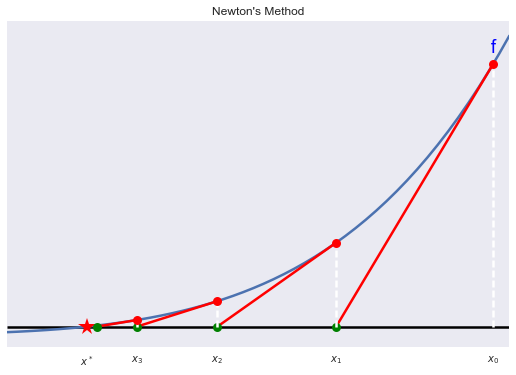

In [3]:
def f(x):
    return x**5 - 3, 5*x**4

xmin, xmax = 1.0, 2.55
xinit, xstar = xmax-0.05, 3**(1/5)
xx = np.linspace(xmin, xmax)
yy, dyy = f(xx)

n = 5
x, y = np.zeros(n), np.zeros(n)
x[0] = xinit
for k in range(n-1):
    y[k], dlag = f(x[k])
    x[k+1] = x[k] - y[k]/dlag

fig2 = demo.figure("Newton's Method",'','',[xmin,xmax], figsize=[9,6])
ax = plt.gca()
ax.set_xticks( x[:4].tolist() + [xstar])
ax.set_xticklabels(['$x_0$', '$x_1$', '$x_2$','$x_3$', '$x^*$'])
ax.set_yticks([])
plt.plot(xx,yy)
plt.hlines(0,xmin, xmax, colors='k')
demo.text(xinit,f(xinit+0.03)[0],'f',fs=18,color='b')
demo.bullet(xstar,0,spec='r*',ms=18)
for xi,xinext,yi in zip(x,x[1:],y):
    plt.plot([xi,xi],[0,yi],'w--')
    plt.plot([xi,xinext],[yi, 0],'r-')
    demo.bullet(xi,yi,spec='r.',ms=18)
    demo.bullet(xinext,0,spec='g.',ms=18)

### Secant Method

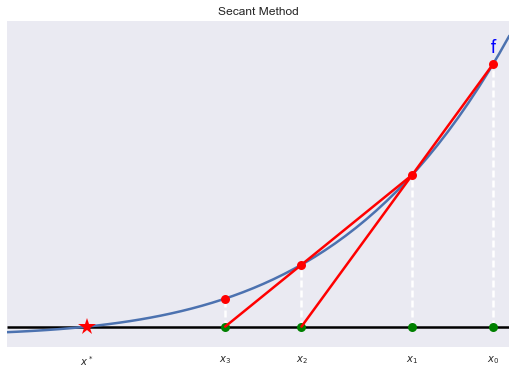

In [4]:
def f(x):
    return x**5 - 3

xmin, xmax = 1.0, 2.55
xinit, xstar = xmax-0.05, 3**(1/5)
xx = np.linspace(xmin, xmax)
yy = f(xx)

n = 4
x = np.zeros(n)
x[:2] = xinit, xinit-0.25
y = f(x)
for i in range(2,n):
    x[i] = x[i-1] - y[i-1]*(x[i-1]-x[i-2]) / (y[i-1]-y[i-2])
    y[i] = f(x[i])
  

fig3 = demo.figure("Secant Method",'','',[xmin,xmax], figsize=[9,6])
ax = plt.gca()
ax.set_xticks( x[:4].tolist() + [xstar])
ax.set_xticklabels(['$x_0$', '$x_1$', '$x_2$','$x_3$', '$x^*$'])
ax.set_yticks([])
plt.plot(xx,yy)
plt.hlines(0,xmin, xmax, colors='k')
demo.text(xinit,f(xinit+0.03),'f',fs=18,color='b')
for xi,yi in zip(x,y):
    plt.plot([xi,xi],[0,yi],'w--')
    demo.bullet(xi,yi,spec='r.',ms=18)
    demo.bullet(xi,0,spec='g.',ms=18)
for xi,xinext,yi in zip(x,x[2:],y):
    plt.plot([xi,xinext],[yi, 0],'r-')
demo.bullet(xstar,0,spec='r*',ms=18)